In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
order_products_prior_df = pd.read_csv('order_products__prior.csv')

In [3]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [4]:
order_products_prior_df.shape

(32434489, 4)

In [5]:
order_products_train_df = pd.read_csv('order_products__train.csv')

In [6]:
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [7]:
order_products_train_df.shape

(1384617, 4)

In [8]:
orders_df = pd.read_csv('orders.csv')
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [9]:
def get_unique_count(x):
    return len(np.unique(x))

cnt_srs = orders_df.groupby("eval_set")["user_id"].aggregate(get_unique_count)
cnt_srs

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

In [10]:
aisles_df = pd.read_csv('aisles.csv')
departments_df = pd.read_csv('departments.csv')
products_df = pd.read_csv('products.csv')

In [11]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [12]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [13]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [14]:
cnt_srs = order_products_prior_df['product_id'].value_counts().reset_index().head(20)
cnt_srs.columns = ['product_id', 'frequency_count']
cnt_srs

,product_id,frequency_count
0,24852,472565
1,13176,379450
2,21137,264683
3,21903,241921
4,47209,213584
5,47766,176815
6,47626,152657
7,16797,142951
8,26209,140627
9,27845,137905


In [15]:
products_selected0 = products_df[products_df.aisle_id.isin(aisles_df.aisle_id)]
banana = products_selected0[products_selected0.product_id=="24852"]
banana

,product_id,product_name,aisle_id,department_id
24851,24852,Banana,24,4
50361,24852,Banana,24,4


In [16]:
cnt_srs['product_name'] = products_df[products_df.product_id.isin(cnt_srs.product_id)].product_name
cnt_srs = cnt_srs.iloc[:1,:]
cnt_srs

,product_id,frequency_count,product_name
0,24852,472565,NaN


In [17]:
order_products_prior_selected = order_products_prior_df[order_products_prior_df.product_id.isin(cnt_srs.product_id)]

In [18]:
order_products_prior_selected.shape

(472565, 4)

In [19]:
order_products_train_selected = order_products_train_df[order_products_train_df.product_id.isin(cnt_srs.product_id)]

In [20]:
order_products_train_selected.shape

(18726, 4)

In [21]:
orders_selected1 = pd.merge(orders_df,order_products_prior_selected, on='order_id')

In [22]:
orders_selected1.shape

(472565, 10)

In [23]:
orders_selected1.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,738281,2,prior,4,2,10,8.0,24852,8,0
1,1199898,2,prior,6,2,9,13.0,24852,7,1
2,3194192,2,prior,7,2,12,14.0,24852,8,1
3,788338,2,prior,8,1,15,27.0,24852,3,1
4,1718559,2,prior,9,2,9,8.0,24852,2,1


In [24]:
orders_selected2 = pd.merge(orders_df,order_products_train_selected, on='order_id')

In [25]:
orders_selected2.shape

(18726, 10)

In [26]:
orders_selected2.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,1492625,2,train,15,1,11,30.0,24852,8,1
1,698604,34,train,6,4,13,30.0,24852,2,0
2,1864787,43,train,12,5,11,26.0,24852,1,1
3,1947848,46,train,20,4,20,11.0,24852,1,1
4,13318,56,train,13,1,9,6.0,24852,1,1


In [27]:
orders_selected = pd.concat([orders_selected1,orders_selected2]).sort_values('order_id')[['eval_set','order_id','product_id','user_id','order_dow','reordered','days_since_prior_order']]
orders_selected.sort_values('order_id',inplace=True)
orders_selected.head()

,eval_set,order_id,product_id,user_id,order_dow,reordered,days_since_prior_order
311544,prior,10,24852,135442,6,1,8.0
419555,prior,20,24852,182912,6,0,NaN
70230,prior,22,24852,30822,1,1,12.0
352561,prior,26,24852,153404,0,1,7.0
62307,prior,52,24852,27498,3,1,1.0


In [28]:
orders_selected.shape

(491291, 7)

In [29]:
orders_selected = orders_selected[orders_selected.product_id==24852].fillna(0).sort_values(by="days_since_prior_order")
orders_selected

,eval_set,order_id,product_id,user_id,order_dow,reordered,days_since_prior_order
297176,prior,3105346,24852,129184,2,0,0.0
381519,prior,1618113,24852,166120,3,0,0.0
23715,prior,3268945,24852,10756,1,1,0.0
445564,prior,1216078,24852,194289,3,0,0.0
435692,prior,2101581,24852,190035,0,0,0.0
267571,prior,467338,24852,115909,1,0,0.0
421881,prior,2430968,24852,183885,5,0,0.0
133833,prior,2431181,24852,57902,3,0,0.0
462591,prior,3041408,24852,201691,0,0,0.0
236091,prior,2430952,24852,102358,6,0,0.0


In [30]:
orders_selected['day'] = orders_selected.groupby('user_id').days_since_prior_order.cumsum()
unique_users = np.unique(orders_selected.user_id)
unique_users = unique_users[:100]
orders_selected = orders_selected[orders_selected.user_id.isin(unique_users)]
unique_users_N = len(unique_users)
unique_users

array([  2,  10,  16,  21,  27,  28,  32,  34,  35,  37,  39,  40,  41,
        43,  46,  47,  54,  56,  57,  62,  65,  70,  73,  77,  85,  87,
        89,  91,  96, 100, 101, 102, 106, 107, 110, 116, 118, 130, 132,
       133, 136, 140, 146, 150, 152, 153, 158, 159, 169, 171, 173, 175,
       176, 180, 182, 187, 188, 190, 194, 198, 202, 209, 210, 211, 213,
       215, 216, 219, 222, 225, 226, 233, 234, 235, 236, 242, 243, 246,
       247, 249, 251, 257, 258, 259, 262, 264, 265, 267, 272, 273, 274,
       275, 277, 281, 284, 285, 296, 299, 309, 311], dtype=int64)

In [31]:
tmp = np.memmap('Memmap', dtype='int32', mode='w+', shape=(int(unique_users_N*orders_selected['day'].max()),2))
user_id_index = 0
for day in range(int(orders_selected['day'].max())):
    tmp[day*unique_users_N:(day+1)*unique_users_N, :] = np.array([unique_users, [day]*unique_users_N]).T
tmp = pd.DataFrame(tmp,columns=['user_id','day'])

In [32]:
df1 = pd.merge(orders_selected,tmp,on=['day','user_id'],how='outer')
df1

,eval_set,order_id,product_id,user_id,order_dow,reordered,days_since_prior_order,day
0,prior,1224907.0,24852.0,10,2.0,0.0,0.0,0.0
1,prior,3026646.0,24852.0,311,1.0,1.0,0.0,0.0
2,prior,1273676.0,24852.0,16,2.0,0.0,0.0,0.0
3,prior,209889.0,24852.0,202,4.0,0.0,0.0,0.0
4,prior,1604596.0,24852.0,243,3.0,0.0,0.0,0.0
5,prior,1675666.0,24852.0,296,0.0,0.0,0.0,0.0
6,prior,1124555.0,24852.0,130,5.0,0.0,0.0,0.0
7,prior,134879.0,24852.0,32,3.0,0.0,0.0,0.0
8,prior,3001081.0,24852.0,85,0.0,0.0,0.0,0.0
9,prior,327827.0,24852.0,37,2.0,0.0,0.0,0.0


In [33]:
df1.to_hdf('data.h5',key='df')

C:\Users\lyudm\Anaconda3\lib\site-packages\pandas\core\generic.py:1471: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['eval_set']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


In [251]:
df1 = pd.read_hdf('data.h5')


In [252]:
df1.sort_values(by=['day','user_id','days_since_prior_order'],inplace=True)

In [253]:
df1['days_since_prior_order1'] = df1.groupby(by='user_id').days_since_prior_order.fillna(method='ffill')

In [254]:
df1.days_since_prior_order1.fillna(0,inplace=True)

In [266]:
df1['ordered'] = (~df1.reordered.isna()).astype(int)

In [267]:
c

,eval_set,order_id,product_id,user_id,order_dow,reordered,days_since_prior_order,day,days_since_prior_order1,ordered
552,NaN,NaN,NaN,2,NaN,NaN,NaN,0.0,0.0,0
0,prior,1224907.0,24852.0,10,2.0,0.0,0.0,0.0,0.0,1
2,prior,1273676.0,24852.0,16,2.0,0.0,0.0,0.0,0.0,1
553,NaN,NaN,NaN,21,2.0,NaN,NaN,0.0,0.0,0
12,prior,3162630.0,24852.0,27,2.0,0.0,0.0,0.0,0.0,1
554,NaN,NaN,NaN,28,2.0,NaN,NaN,0.0,0.0,0
7,prior,134879.0,24852.0,32,3.0,0.0,0.0,0.0,0.0,1
555,NaN,NaN,NaN,34,3.0,NaN,NaN,0.0,0.0,0
556,NaN,NaN,NaN,35,3.0,NaN,NaN,0.0,0.0,0
9,prior,327827.0,24852.0,37,2.0,0.0,0.0,0.0,0.0,1


In [268]:
df1.order_dow.fillna(method='ffill',inplace=True)

In [286]:
k10 = np.sum(df1.ordered==0)
k11 = np.sum(df1.ordered==1)
prob = k10/(k10+k11)
prob

0.9809661735802214

In [258]:
X_train = df1[['user_id','order_dow','days_since_prior_order1']]#[:int(len(df1)*0.7)]
y_train= df1['ordered']#[:int(len(df1)*0.7)].astype(int)

In [241]:
X_train.fillna(0,inplace=True)

In [125]:
y_train

552      0
0        1
2        1
553      0
12       1
554      0
7        1
555      0
556      0
9        1
21       1
557      0
558      0
23       1
32       1
16       1
15       1
559      0
560      0
561      0
562      0
563      0
564      0
565      0
8        1
566      0
567      0
568      0
10       1
569      0
        ..
28972    0
28973    0
28974    0
28975    0
28976    0
28977    0
28978    0
28979    0
28980    0
28981    0
28982    0
28983    0
28984    0
28985    0
28986    0
28987    0
28988    0
28989    0
28990    0
28991    0
28992    0
28993    0
28994    0
28995    0
28996    0
28997    0
28998    0
28999    0
29000    0
545      1
Name: ordered, Length: 29001, dtype: int32

In [285]:
k10 = np.sum(y_train==0)
k11 = np.sum(y_train==1)
prob = k10/(k10+k11)
prob

0.9811330049261083

In [242]:
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, test_size=0.30, random_state=42)

In [127]:
X_train.shape, y_train.shape, y_train.sum() 

((20300, 3), (20300,), 383)

In [143]:
clf = LogisticRegression(random_state=1).fit(X_train, y_train)

In [144]:
y_pred = clf.predict(X_test)
#print(y_pred)
#print(clf.predict_proba(X_test))
print(clf.score(X_test, y_test))

0.9805769451787151


In [130]:
y_pred.shape

(8701,)

In [131]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [132]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(y_test, y_pred, average='micro')

In [146]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='micro')

0.9805769451787151

In [147]:
from sklearn.metrics import precision_score
recall_score(y_test, y_pred, average='micro')

0.9805769451787151

In [117]:
y_train.shape, y_train.sum()

((20300,), 383)

In [118]:
y_test.shape, y_test.sum()

((8701,), 169)

In [119]:
y_pred.shape, y_pred.sum()

((8701,), 0)

In [53]:
X_train

,user_id,order_dow,days_since_prior_order1
17276,173,2.0,6.0
3439,222,5.0,10.0
8421,309,0.0,2.0
16862,107,1.0,1.0
28293,277,0.0,30.0
20368,187,1.0,15.0
18715,285,0.0,30.0
16062,91,0.0,11.0
26955,182,0.0,13.0
19186,222,2.0,26.0


In [54]:
#LinearRegression

In [55]:
X_train = df1[['user_id','order_dow','days_since_prior_order1']]#[:int(len(df1)*0.7)]
y_train= df1['ordered']#[:int(len(df1)*0.7)].astype(int)

In [56]:
X_train.fillna(0,inplace=True)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, test_size=0.30, random_state=42)

In [58]:
X_train.shape, y_train.shape, y_train.sum() 

((20300, 3), (20300,), 383)

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
model = LinearRegression()

In [61]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [62]:
r_sq = model.score(X_train, y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.0046153208063814954


In [63]:
print('intercept:', model.intercept_)


intercept: 0.029510691129168883


In [64]:
>>> print('slope:', model.coef_)

slope: [ 2.02832954e-06  1.02717355e-03 -8.48401250e-04]


In [65]:
y_pred = model.predict(X_train)
print('predicted response:', y_pred, sep='\n')

predicted response:
[0.02682553 0.02661284 0.02844064 ... 0.03300193 0.00463673 0.0198778 ]


In [ ]:
# random forest

In [269]:
X_train = df1[['user_id','order_dow','days_since_prior_order1']]#[:int(len(df1)*0.7)]
y_train= df1['ordered']#[:int(len(df1)*0.7)].astype(int)

In [270]:
X_train.fillna(0,inplace=True)

In [271]:
X_train, X_test, y_train, y_test = train_test_split(
X_train, y_train, test_size=0.30, random_state=42)

In [272]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators=50, 
                               bootstrap = True,
                               max_features = 'sqrt')

model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [273]:
rf_predictions = model.predict(X_test)

rf_probs = model.predict_proba(X_test)[:, 1]

In [274]:
rf_probs

array([0.        , 0.        , 0.        , ..., 0.        , 0.00642857,
       0.        ])

In [275]:
from sklearn import metrics

print(metrics.classification_report(y_test.reshape(len(y_test,)).astype(int), (rf_probs.reshape(len(y_test,))>0.2).astype(int)))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98      8532
          1       0.14      0.18      0.16       169

avg / total       0.97      0.96      0.96      8701



In [280]:
k1 = np.sum(y_test==0)
k1

8532

In [281]:
k2 = np.sum(y_test==1)
k2

169

In [150]:
# random forest_continue
RSEED = 50

In [151]:
import seaborn as sns

In [152]:
from sklearn.tree import DecisionTreeClassifier

# Make a decision tree and train
tree = DecisionTreeClassifier(random_state=RSEED)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=50,
            splitter='best')

In [153]:
print(f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.')

Decision tree has 1581 nodes with maximum depth 19.


In [180]:
print(f'Model Accuracy: {tree.score(X_train, y_train)}')

Model Accuracy: 0.9852216748768473


In [155]:
# Limit maximum depth and train
short_tree = DecisionTreeClassifier(max_depth = 3, random_state=RSEED)
short_tree.fit(X_train, y_train)

print(f'Model Accuracy: {short_tree.score(X_train, y_train)}')

Model Accuracy: 0.9811330049261083


In [181]:
from sklearn.metrics import f1_score

In [182]:
f1_score(y_test, y_pred, average='macro')

0.49509661695584056

In [184]:
from sklearn.metrics import precision_score
recall_score(y_test, y_pred, average='micro')

0.9805769451787151

In [ ]:
#graphics

In [149]:
import seaborn as sns
color = sns.color_palette()

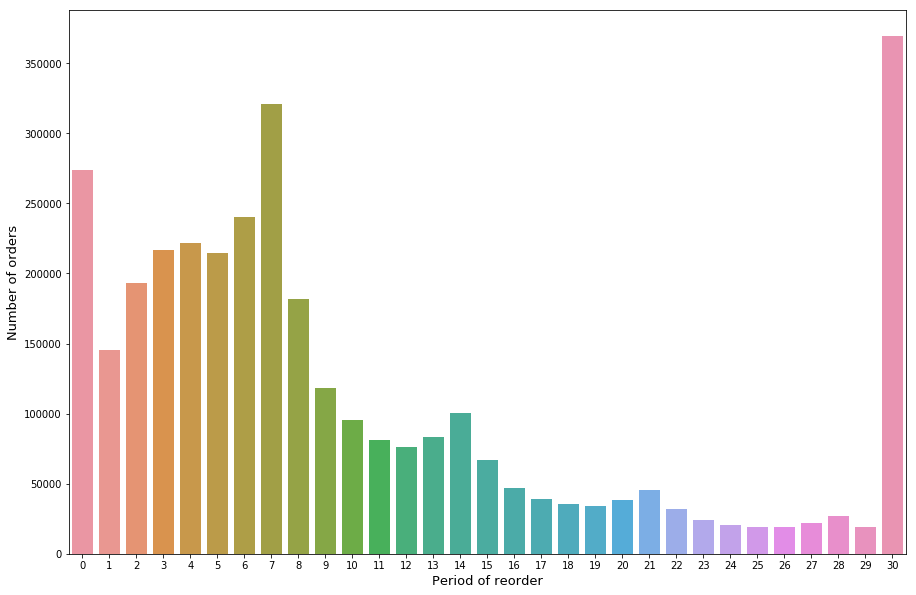

In [152]:
grouped = orders_df.groupby("order_id")["days_since_prior_order"].aggregate("sum").reset_index()
grouped = grouped.days_since_prior_order.value_counts()

from matplotlib.ticker import FormatStrFormatter
f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(grouped.index, grouped.values)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.ylabel('Number of orders', fontsize=13)
plt.xlabel('Period of reorder', fontsize=13)
plt.show()

In [ ]:
#for banana graphics

In [164]:
orders_selected00 = pd.concat([orders_selected1,orders_selected2]).sort_values('order_id')[['eval_set','order_id','product_id','user_id','order_dow','reordered','days_since_prior_order','add_to_cart_order']]
orders_selected00.sort_values('order_id',inplace=True)
orders_selected00.head()

,eval_set,order_id,product_id,user_id,order_dow,reordered,days_since_prior_order,add_to_cart_order
311544,prior,10,24852,135442,6,1,8.0,1
419555,prior,20,24852,182912,6,0,NaN,6
70230,prior,22,24852,30822,1,1,12.0,3
352561,prior,26,24852,153404,0,1,7.0,2
62307,prior,52,24852,27498,3,1,1.0,2


In [165]:
orders_selected00 = orders_selected00[orders_selected00.product_id==24852].fillna(0).sort_values(by="days_since_prior_order")
orders_selected00

,eval_set,order_id,product_id,user_id,order_dow,reordered,days_since_prior_order,add_to_cart_order
297176,prior,3105346,24852,129184,2,0,0.0,6
381519,prior,1618113,24852,166120,3,0,0.0,3
23715,prior,3268945,24852,10756,1,1,0.0,8
445564,prior,1216078,24852,194289,3,0,0.0,3
435692,prior,2101581,24852,190035,0,0,0.0,3
267571,prior,467338,24852,115909,1,0,0.0,5
421881,prior,2430968,24852,183885,5,0,0.0,12
133833,prior,2431181,24852,57902,3,0,0.0,5
462591,prior,3041408,24852,201691,0,0,0.0,11
236091,prior,2430952,24852,102358,6,0,0.0,4


In [166]:
orders_selected00['day'] = orders_selected00.groupby('user_id').days_since_prior_order.cumsum()
unique_users = np.unique(orders_selected00.user_id)
unique_users = unique_users[:100]
orders_selected00 = orders_selected00[orders_selected00.user_id.isin(unique_users)]
unique_users_N = len(unique_users)
unique_users

array([  2,  10,  16,  21,  27,  28,  32,  34,  35,  37,  39,  40,  41,
        43,  46,  47,  54,  56,  57,  62,  65,  70,  73,  77,  85,  87,
        89,  91,  96, 100, 101, 102, 106, 107, 110, 116, 118, 130, 132,
       133, 136, 140, 146, 150, 152, 153, 158, 159, 169, 171, 173, 175,
       176, 180, 182, 187, 188, 190, 194, 198, 202, 209, 210, 211, 213,
       215, 216, 219, 222, 225, 226, 233, 234, 235, 236, 242, 243, 246,
       247, 249, 251, 257, 258, 259, 262, 264, 265, 267, 272, 273, 274,
       275, 277, 281, 284, 285, 296, 299, 309, 311], dtype=int64)

In [167]:
tmp = np.memmap('Memmap', dtype='int32', mode='w+', shape=(int(unique_users_N*orders_selected['day'].max()),2))
user_id_index = 0
for day in range(int(orders_selected['day'].max())):
    tmp[day*unique_users_N:(day+1)*unique_users_N, :] = np.array([unique_users, [day]*unique_users_N]).T
tmp = pd.DataFrame(tmp,columns=['user_id','day'])

OSError: [Errno 22] Invalid argument: 'Memmap'

In [171]:
df0 = pd.merge(orders_selected00,tmp,on=['day','user_id'],how='outer')
df0

,eval_set,order_id,product_id,user_id,order_dow,reordered,days_since_prior_order,add_to_cart_order,day
0,prior,1224907.0,24852.0,10,2.0,0.0,0.0,2.0,0.0
1,prior,3026646.0,24852.0,311,1.0,1.0,0.0,2.0,0.0
2,prior,1273676.0,24852.0,16,2.0,0.0,0.0,2.0,0.0
3,prior,209889.0,24852.0,202,4.0,0.0,0.0,14.0,0.0
4,prior,1604596.0,24852.0,243,3.0,0.0,0.0,3.0,0.0
5,prior,1675666.0,24852.0,296,0.0,0.0,0.0,8.0,0.0
6,prior,1124555.0,24852.0,130,5.0,0.0,0.0,2.0,0.0
7,prior,134879.0,24852.0,32,3.0,0.0,0.0,11.0,0.0
8,prior,3001081.0,24852.0,85,0.0,0.0,0.0,1.0,0.0
9,prior,327827.0,24852.0,37,2.0,0.0,0.0,2.0,0.0


In [169]:
df0 = pd.read_hdf('data.h5')


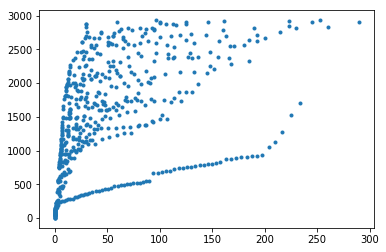

In [172]:
plt.plot(df0.day.values,df0.add_to_cart_order.cumsum().values,'.')

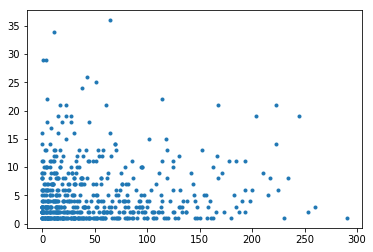

In [173]:
plt.plot(df0.day.values,df0.add_to_cart_order.values,'.')

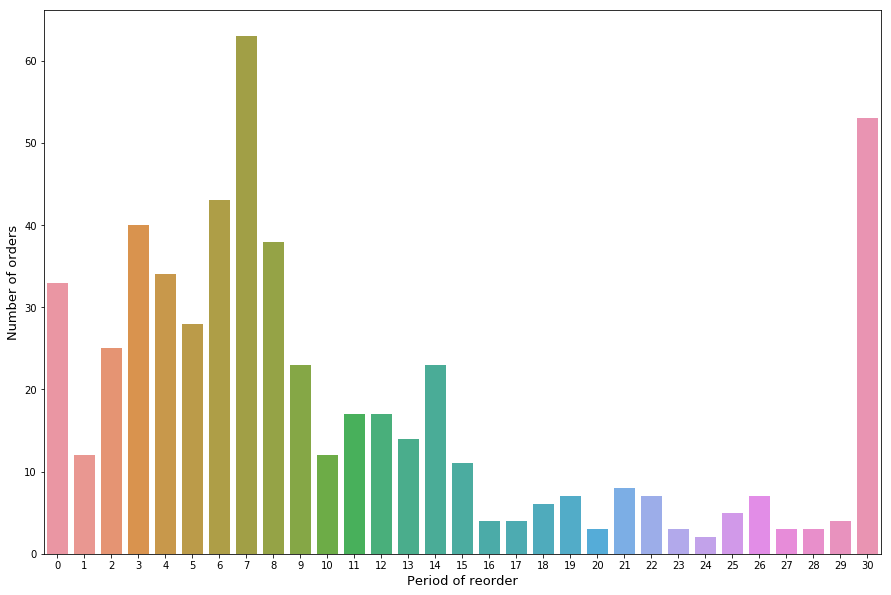

In [174]:
grouped = df0.groupby("order_id")["days_since_prior_order"].aggregate("sum").reset_index()
grouped = grouped.days_since_prior_order.value_counts()

from matplotlib.ticker import FormatStrFormatter
f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(grouped.index, grouped.values)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.ylabel('Number of orders', fontsize=13)
plt.xlabel('Period of reorder', fontsize=13)
plt.show()